In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import yaml
from yaml.loader import SafeLoader
from urllib.request import urlretrieve

In [189]:
turbine_typ = ['WES250','Vestas_V25_200kW','VesV20','En18','JI20kW']
columns = ['name','manufacturer','HUB_HEIGHT',
           0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
           20,21,22,23,24,25,26,27,28,29,30,31,32,33,34] 
turbine_df = pd.DataFrame(columns=columns,index=turbine_typ)

for t in turbine_typ:
    with open(f'turbine/{t}.yaml','r') as f:
        data = yaml.load(f, Loader=SafeLoader)
        turbine_df.loc[t,'name']=data['name']
        turbine_df.loc[t,'manufacturer']=data['manufacturer']
        turbine_df.loc[t,'HUB_HEIGHT']=data['HUB_HEIGHT']
        
        for v in range(len(data['V'])):
            if turbine_df.loc[t,data['V'][v]]<data['POW'][v] or pd.isna(turbine_df.loc[t,data['V'][v]]):
                turbine_df.loc[t,data['V'][v]]=data['POW'][v]
                
        for v in range(33,-1,-1):
            if pd.isna(turbine_df.loc[t,v]) \
            and pd.isna(turbine_df.loc[t,v+1]) == False:
                turbine_df.loc[t,v]=turbine_df.loc[t,v+1]
                
turbine_df = turbine_df.fillna(0)
turbine_df.to_csv('turbine.csv')
turbine_df

,name,manufacturer,HUB_HEIGHT,0,1,2,3,4,5,6,...,25,26,27,28,29,30,31,32,33,34
WES250,WES250 250 kW,WES,30.0,0,0,0,0.001,0.0044,0.0149,0.0293,...,0.250,0,0,0,0,0,0,0,0,0
Vestas_V25_200kW,Vestas V25 200 kW,Vestas,29.0,0,0,0,0.000,0.0036,0.0123,0.0244,...,0.200,0,0,0,0,0,0,0,0,0
VesV20,Vestas V20 100 kW,Vestas,24.0,0,0,0,0.000,0.0000,0.0050,0.0130,...,0.105,0,0,0,0,0,0,0,0,0
En18,Enercon E18 80 kW,Enercon,28.5,0,0,0,0.000,0.0037,0.0081,0.0144,...,0.080,0,0,0,0,0,0,0,0,0
JI20kW,Jonica Impianti/ 20 kW,Jonica Impianti,12.0,0,0,0,0.000,0.0000,0.0005,0.0010,...,0.000,0,0,0,0,0,0,0,0,0


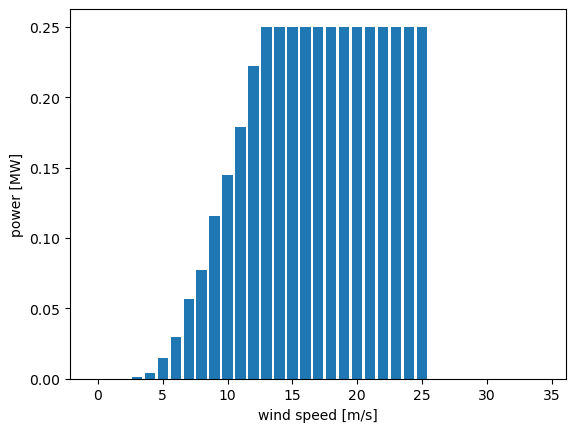

In [190]:
def leistung_hist(index):
    
    #df_parse = turbine_df.query(f"index == {index}")
    df = pd.DataFrame(columns=['POW'],index=list(range(0,35)))
    for i in range(0,35):
        df.loc[i,'POW']=turbine_df.loc[index,i]

    plt.bar(df.index,df['POW'])
    plt.xlabel('wind speed [m/s]')
    plt.ylabel('power [MW]')
    
leistung_hist('WES250')